In [0]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import sys
import pickle
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

# DATOS

In [0]:
fileObject_df1 = open('/content/drive/My Drive/Vision/test_1_8.pickle','rb')
X_test,y_test = pickle.load(fileObject_df1) 

fileObject_df2 = open('/content/drive/My Drive/Vision/train_1_4.pickle','rb')
X_train,y_train = pickle.load(fileObject_df2) 

In [0]:
X_train,X_test,y_train,y_test=np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4725, 256, 256, 3) (2196, 256, 256, 3) (4725,) (2196,)


In [0]:
X_train_1=np.resize(X_train,(len(X_train),224,224,3))
X_test_1=np.resize(X_test, (len(X_test),224,224,3))

x_train = X_train_1.reshape([-1, 224, 224, 3])
x_test = X_test_1.reshape([-1, 224, 224, 3])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4725, 224, 224, 3) (2196, 224, 224, 3) (4725,) (2196,)


# TRANSFER LEARNING

In [0]:
model_A = tf.keras.applications.MobileNet(weights='imagenet')
model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(5, activation='sigmoid'))

W0820 20:54:08.194177 140119988819840 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model_B_on_A.fit(x_train, y_train, epochs=10, batch_size=128,validation_data=(x_test, y_test))

Train on 4725 samples, validate on 2196 samples
Epoch 1/10
4725/4725 [==============================] - 593s 125ms/sample - loss: 1.0843 - acc: 0.5344 - val_loss: 0.7465 - val_acc: 0.5041
Epoch 2/10
4725/4725 [==============================] - 597s 126ms/sample - loss: 0.7571 - acc: 0.6578 - val_loss: 0.7133 - val_acc: 0.5556
Epoch 3/10
4725/4725 [==============================] - 595s 126ms/sample - loss: 0.6994 - acc: 0.6868 - val_loss: 0.7053 - val_acc: 0.5934
Epoch 4/10
4725/4725 [==============================] - 595s 126ms/sample - loss: 0.6731 - acc: 0.7014 - val_loss: 0.7006 - val_acc: 0.6006
Epoch 5/10
4725/4725 [==============================] - 595s 126ms/sample - loss: 0.6602 - acc: 0.7060 - val_loss: 0.6986 - val_acc: 0.5947
Epoch 6/10
4725/4725 [==============================] - 596s 126ms/sample - loss: 0.6505 - acc: 0.7113 - val_loss: 0.6958 - val_acc: 0.6111
Epoch 7/10
4725/4725 [==============================] - 597s 126ms/sample - loss: 0.6419 - acc: 0.7130 - val_los

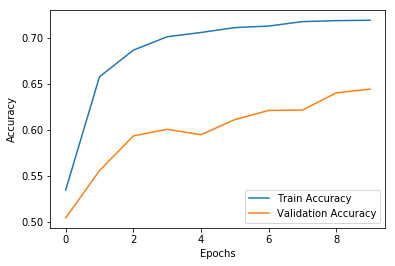

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()